In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, color, transform
import matplotlib.ticker as tic

In [2]:
image1 = io.imread('1.png')
image2 = io.imread('2.png')
image3 = io.imread('3.png')
image_cam = io.imread('cam.png')
image_cam_lens = io.imread('cam-lens.png')
images = [image1, image2, image3, image_cam, image_cam_lens]
names = ['1', '2', '3', 'cam', 'cam_lens']

In [3]:
# Выравнивание изображения для получения нормали
def rotate_image(img):
    img = transform.rotate(img, 5.3, preserve_range=True)
    row = img[len(img)//2] / 255
    image = np.full(img.shape, row)
    return image

In [4]:
edges = [rotate_image(img) for img in images]

In [5]:
# Функция размытия края полуплоскости
# Построение графика функции размытия полуплоскости
def plot_ESF(img, add_to_title = ""):
    y = np.mean(img, axis=0)
    x = np.arange(len(y))

    fig, ax = plt.subplots()
    ax.plot(x, y, linewidth = 3)

    #Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(tic.MultipleLocator(10))
    ax.yaxis.set_major_locator(tic.MultipleLocator(0.5))

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("Размытие края полуплоскости " + add_to_title, fontsize=16)
    plt.grid()
    plt.plot(color='red')
    plt.show()

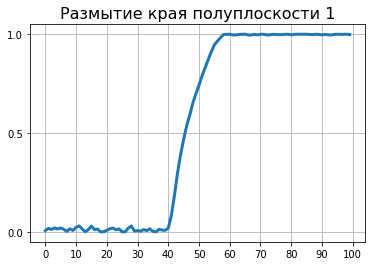

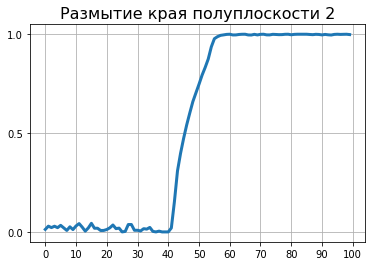

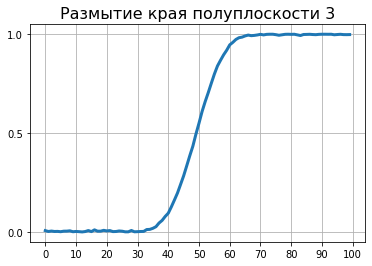

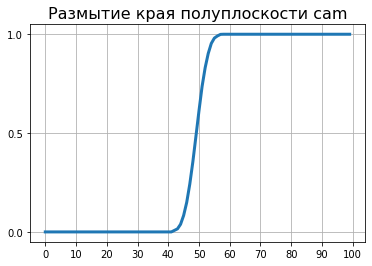

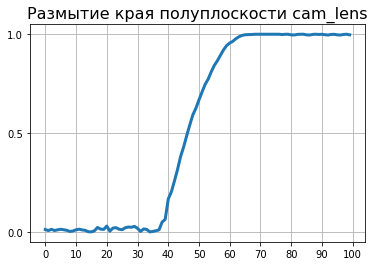

In [6]:
for i in range(len(edges)):
  plot_ESF(edges[i], names[i])

In [7]:
# Функция размытия линии
# Построение графика функции размытия линии
def plot_LSF (img, add_to_title = ""):
    y = np.mean(img, axis=0)
    x = np.arange(len(y))

    y1 = np.gradient(y)
    y1 /= max(y1)   # Нормирование графика

    fig, ax = plt.subplots()
    ax.plot(x, y1, linewidth = 3)

    #Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(tic.MultipleLocator(10))
    ax.yaxis.set_major_locator(tic.MultipleLocator(0.2))

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("Функция размытия линии " + add_to_title, fontsize=16)
    plt.grid()
    plt.show()

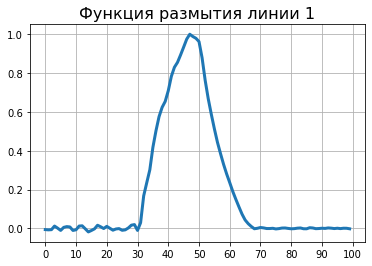

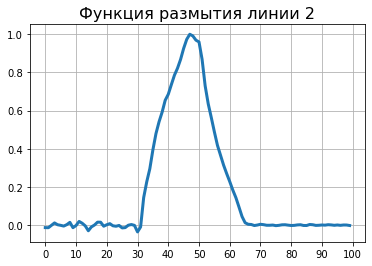

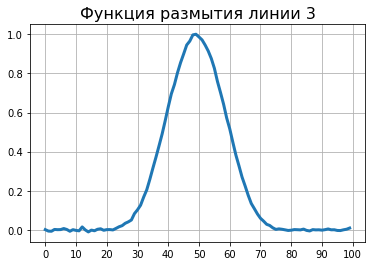

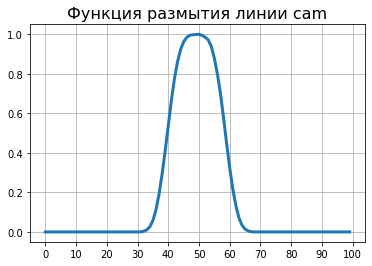

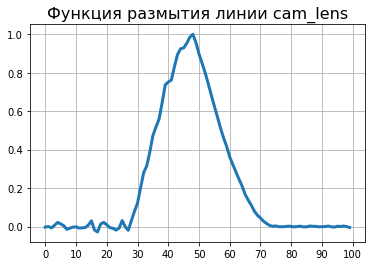

In [8]:
for i in range(len(images)):
  plot_LSF(images[i], names[i])

In [9]:
#Функция передачи модуляции
#  Построение графика функции передачи модуляции
def plot_MTF(img, add_to_title = ""):
    y = np.mean(img, axis=0)
    x = np.arange(len(y))

    y1 = np.gradient(y)
    y1 = np.fft.fft(y1)    # Дискретное фурье преобразование

    fig, ax = plt.subplots()
    ax.plot(x[:len(x)//10], np.abs(y1 / max(y1))[:len(x)//10], linewidth = 3)

    #Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(tic.MultipleLocator(1))
    ax.yaxis.set_major_locator(tic.MultipleLocator(0.5))

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("Функция передачи модуляции " + add_to_title, fontsize=16)
    plt.grid()
    plt.show()

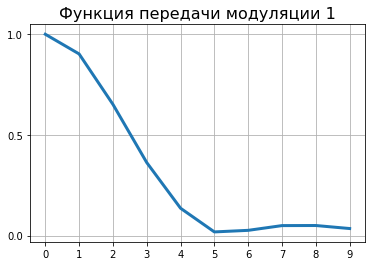

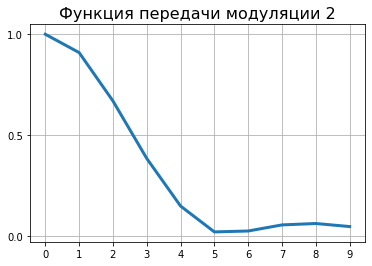

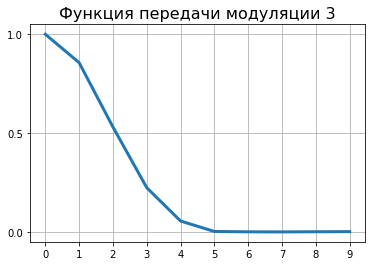

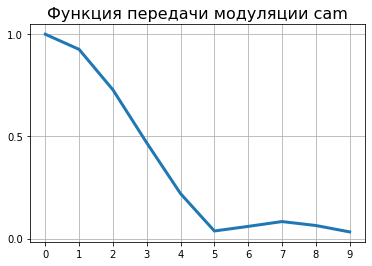

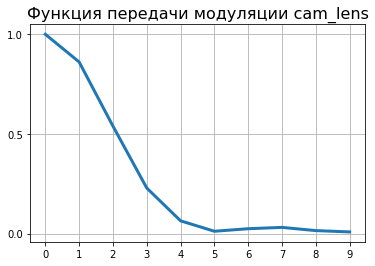

In [10]:
for i in range(len(images)):
  plot_MTF(images[i], names[i])

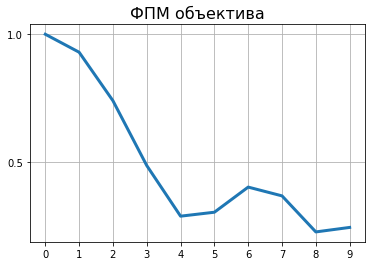

In [11]:
#функция передачи модуляции объектива
def divide_fpm(img1, img2):
    y1 = np.mean(img1, axis=0)
    x1 = np.arange(len(y1))
    y11 = np.gradient(y1)
    y11 = np.fft.fft(y11)

    y2 = np.mean(img2, axis=0)
    x2 = np.arange(len(y2))
    y12 = np.gradient(y2)
    y12 = np.fft.fft(y12)

    fig, ax = plt.subplots()

    signal1=np.abs(y11 / max(y11))[:len(x1)//10]
    signal2=np.abs(y12 / max(y12))[:len(x2)//10]
    ax.plot(x1[:len(x1)//10], np.divide(signal1, signal2), linewidth = 3)
    # print(np.abs(y1 / max(y1))[:len(x)//10])
    #Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(tic.MultipleLocator(1))
    ax.yaxis.set_major_locator(tic.MultipleLocator(0.5))

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("ФПМ объектива", fontsize=16)
    plt.grid()
    plt.show()

divide_fpm(image_cam_lens, image_cam)

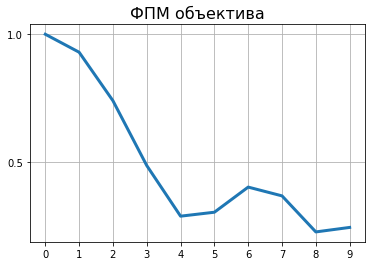

In [12]:
def divide_fpm(img1, img2, add_to_title = ""):
    y1 = np.mean(img1, axis=0)
    x1 = np.arange(len(y1))
    y11 = np.gradient(y1)
    y11 = np.fft.fft(y11)

    y2 = np.mean(img2, axis=0)
    x2 = np.arange(len(y2))
    y12 = np.gradient(y2)
    y12 = np.fft.fft(y12)

    fig, ax = plt.subplots()

    shrek1=np.abs(y11 / max(y11))[:len(x1)//10]
    shrek2=np.abs(y12 / max(y12))[:len(x2)//10]
    ax.plot(x1[:len(x1)//10], np.divide(shrek1, shrek2), linewidth = 3)
    # print(np.abs(y1 / max(y1))[:len(x)//10])
    #Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(tic.MultipleLocator(1))
    ax.yaxis.set_major_locator(tic.MultipleLocator(0.5))

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title(add_to_title, fontsize=16)
    plt.grid()
    plt.show()

divide_fpm(image_cam_lens, image_cam, "ФПМ объектива")